In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def process_line(line):
    """
    Process a single line of data containing 4 arrays.
    Returns the four arrays as separate numpy arrays.
    """
    try:
        # Remove outer brackets and split by ']'
        arrays_str = line.strip()[1:-1].split(']')
        
        # Process each array string
        processed_arrays = []
        for arr_str in arrays_str:
            # Clean the string and convert to array
            # Remove leading '[' and split by spaces
            clean_str = arr_str.strip().strip('[').strip()
            if clean_str:  # Check if there's data to process
                numbers = np.array([float(x) for x in clean_str.split() if x])
                processed_arrays.append(numbers)
        
        return processed_arrays
    except Exception as e:
        print(f"Error processing line: {e}")
        return None

def load_data_file(file_path):
    """
    Load data from file line by line and process each line.
    Returns a list of processed lines, where each line contains the four arrays.
    """
    all_data = []
    
    try:
        with open(file_path, 'r') as file:
            for i, line in enumerate(file, 1):
                if line.strip():  # Skip empty lines
                    result = process_line(line)
                    if result is not None:
                        all_data.append(result)
    except Exception as e:
        print(f"Error reading file: {e}")
    
    return all_data

/tmp/ipykernel_27043/509897168.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 1, sharex=True)


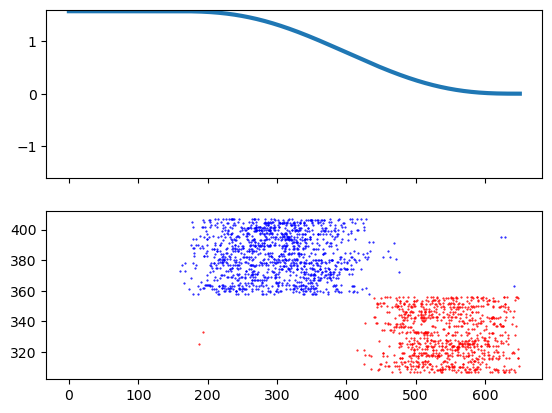

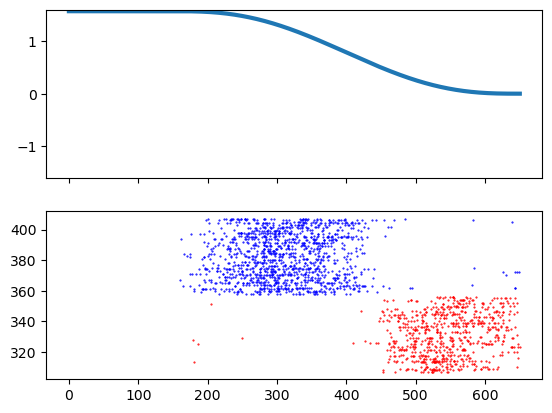

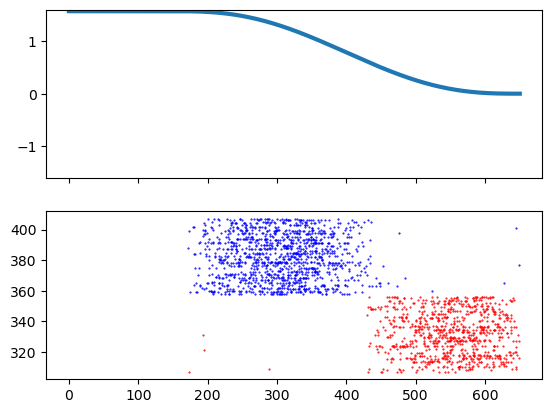

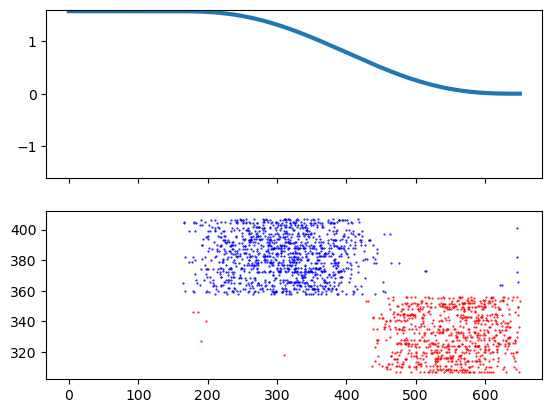

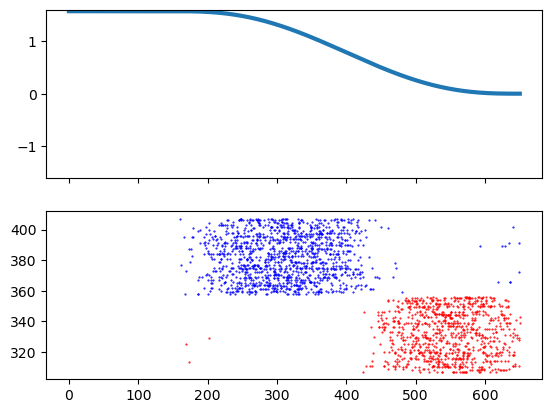

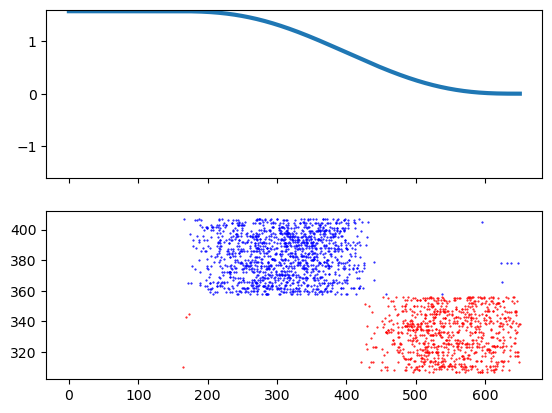

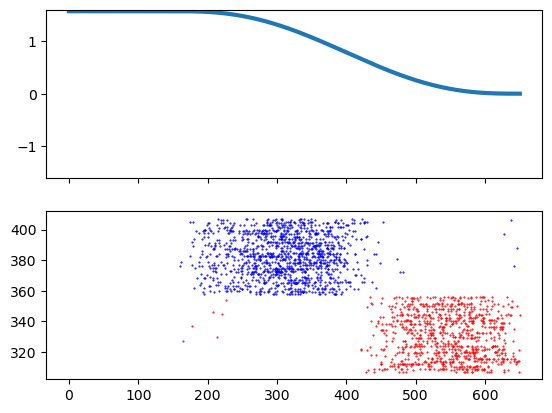

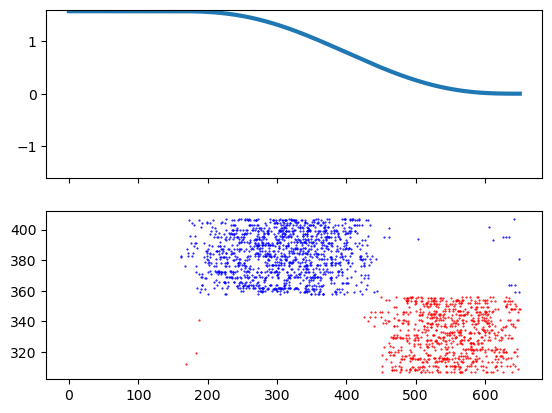

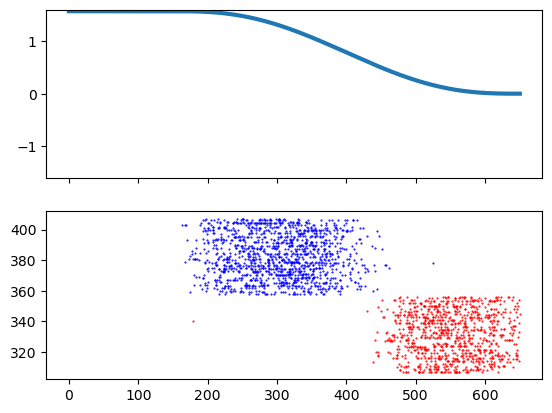

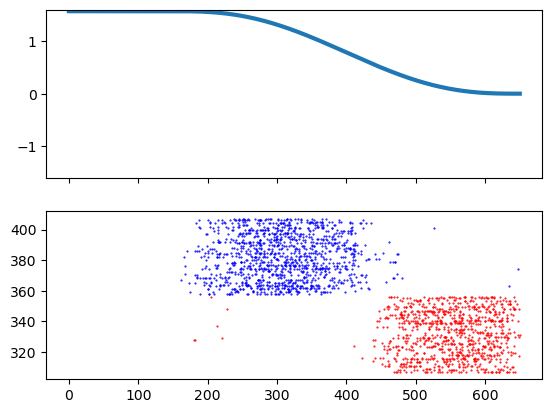

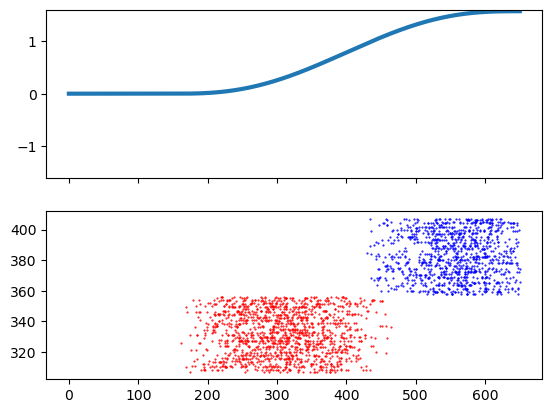

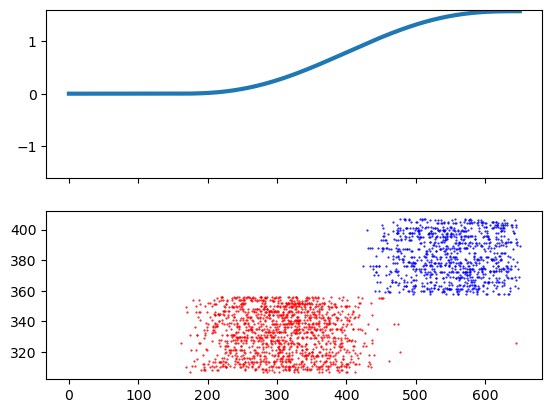

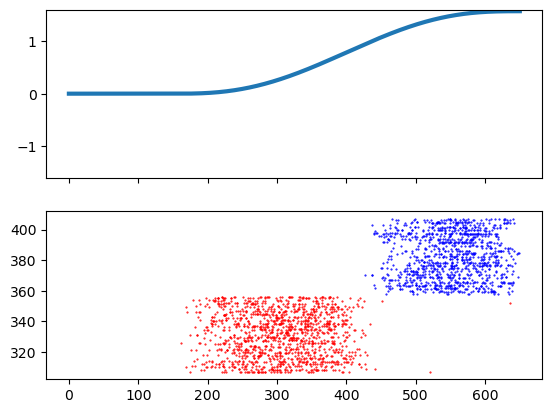

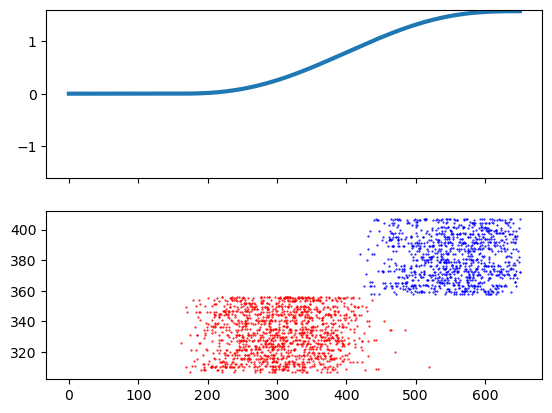

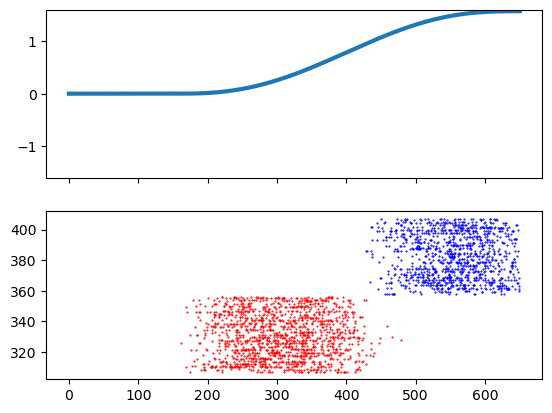

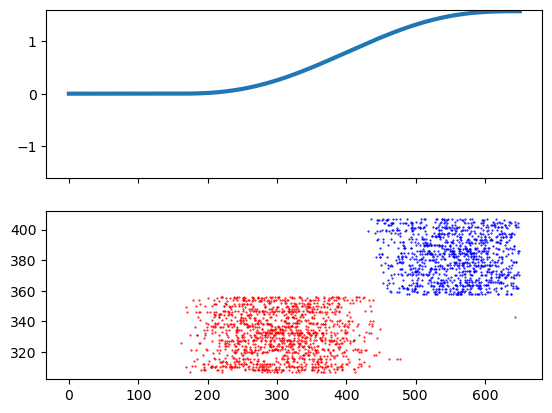

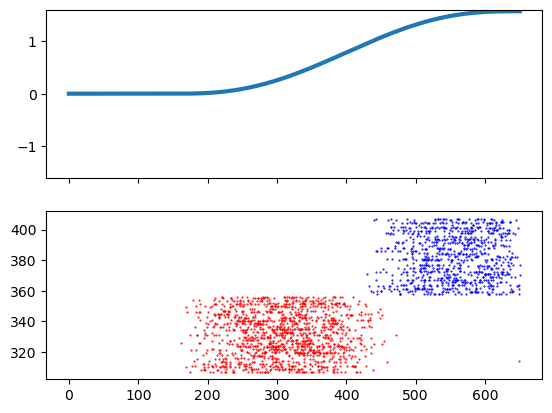

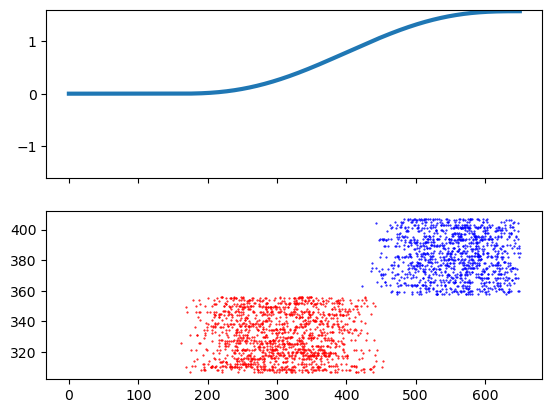

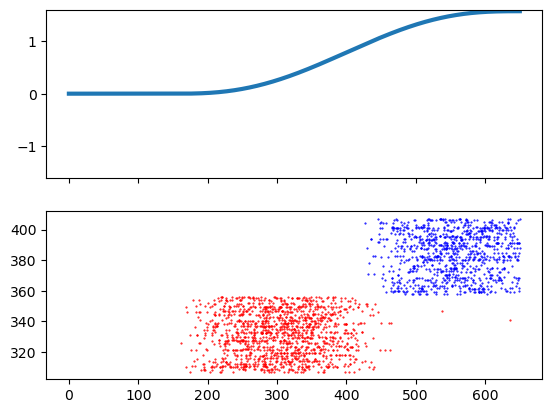

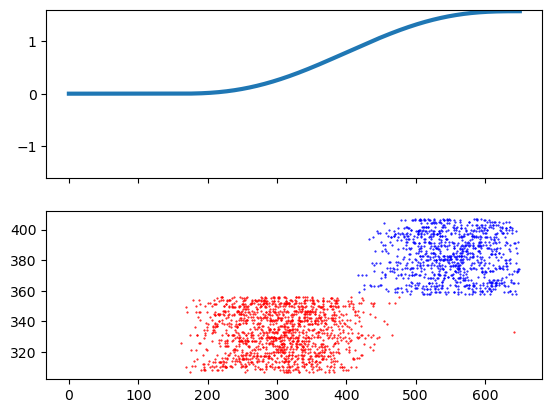

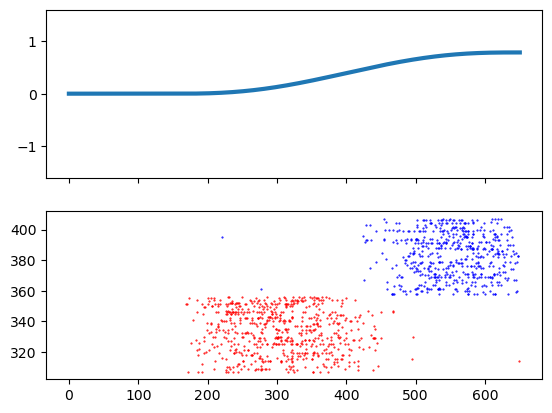

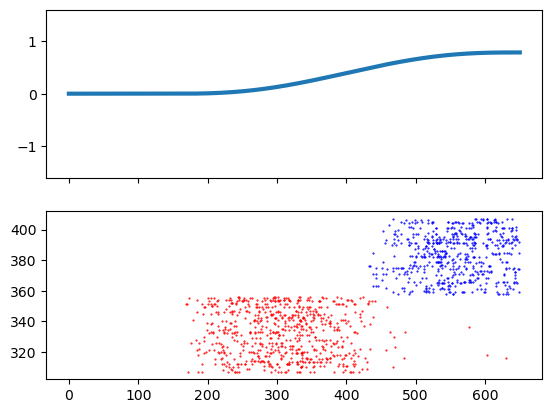

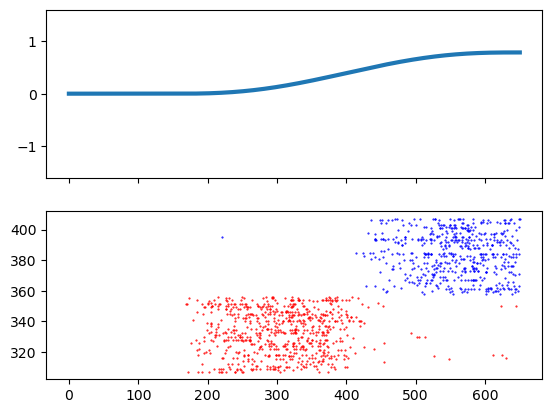

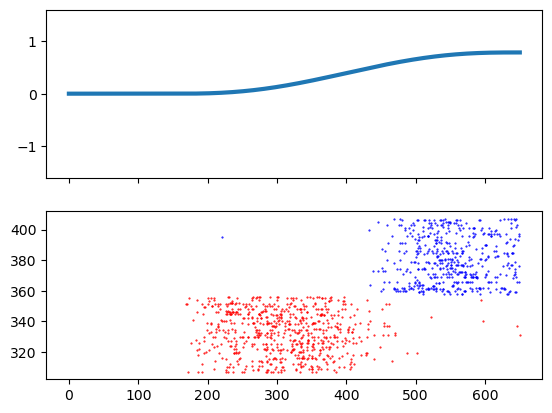

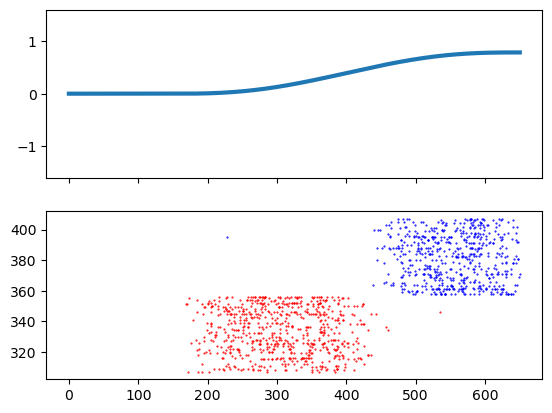

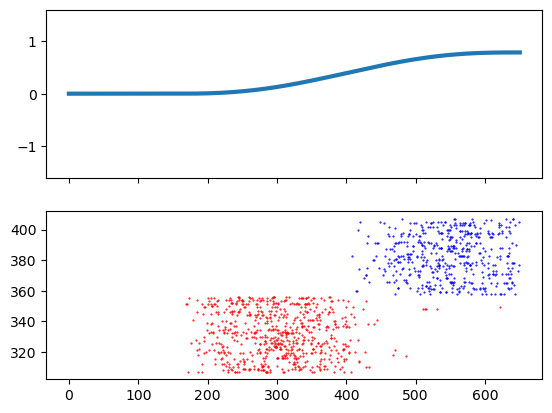

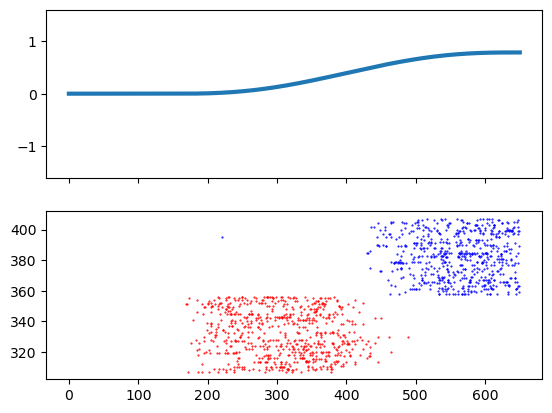

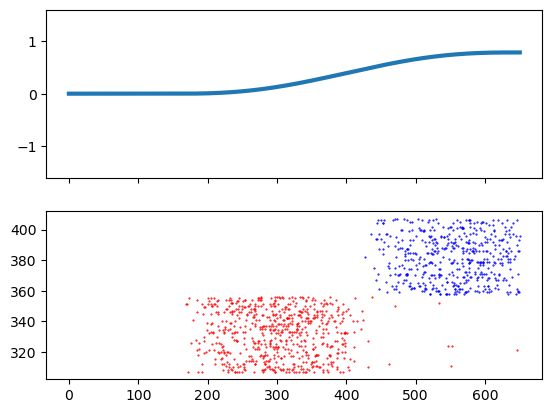

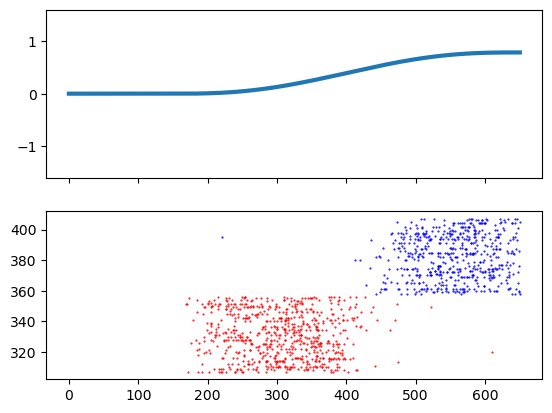

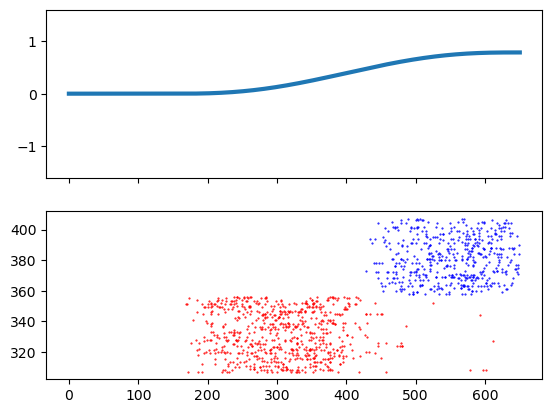

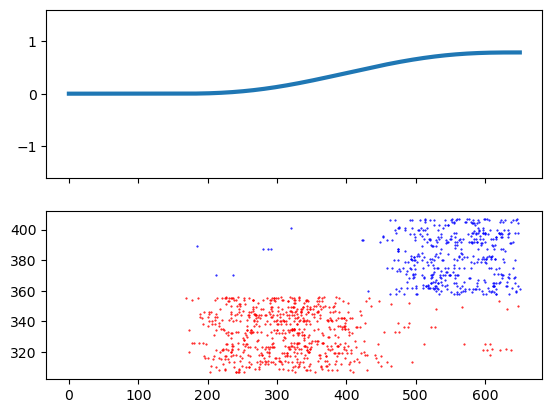

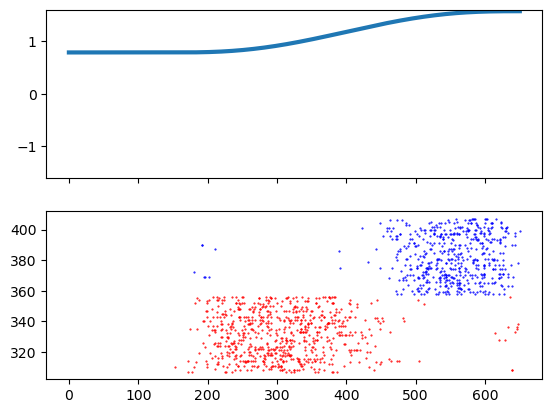

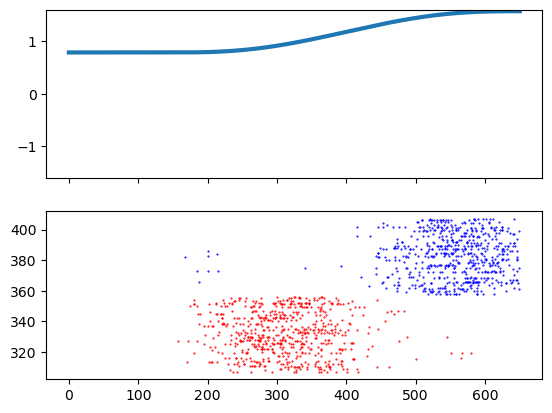

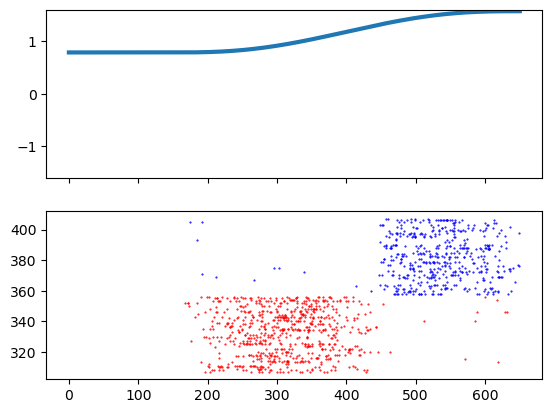

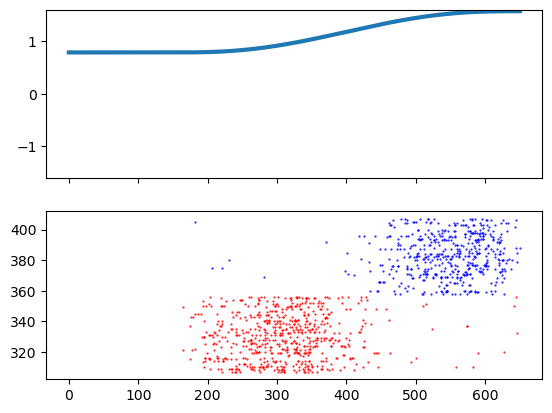

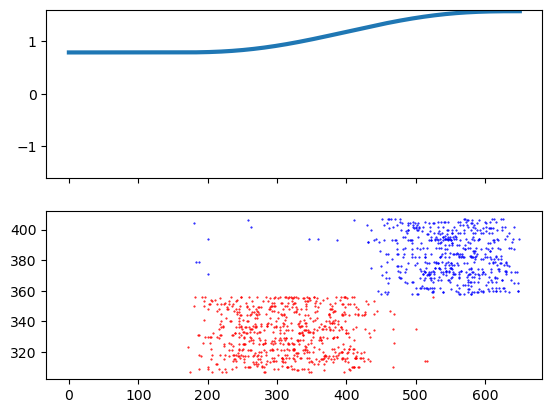

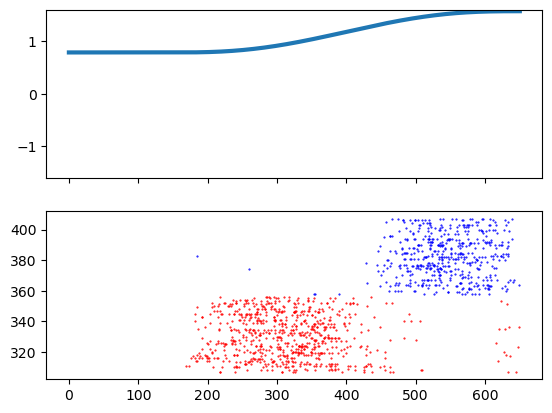

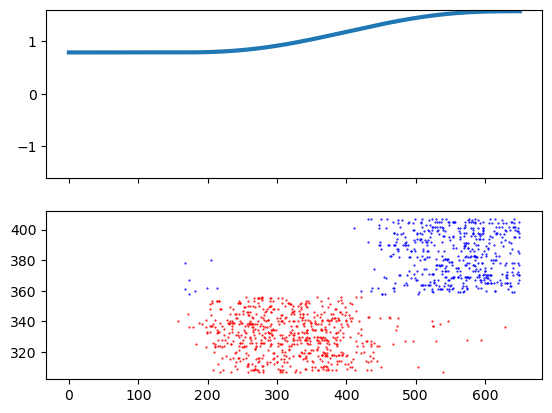

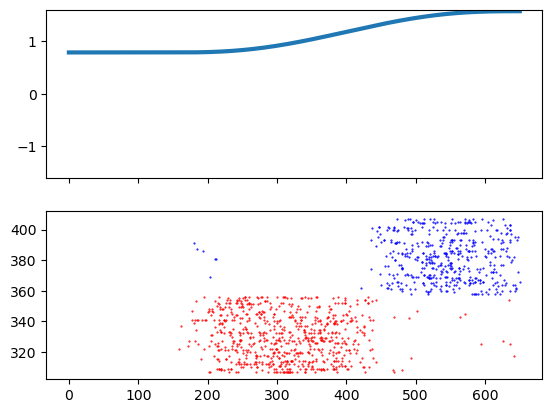

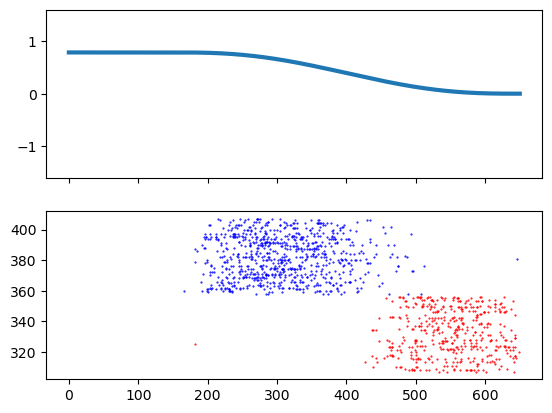

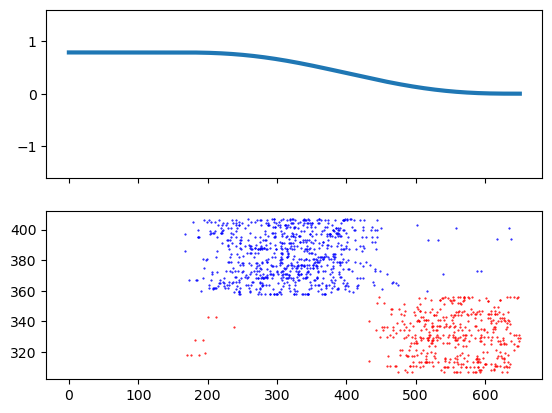

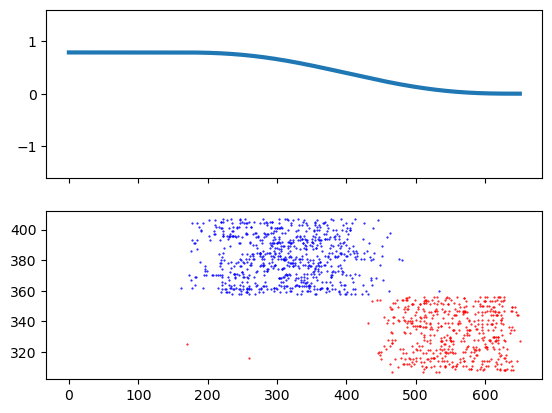

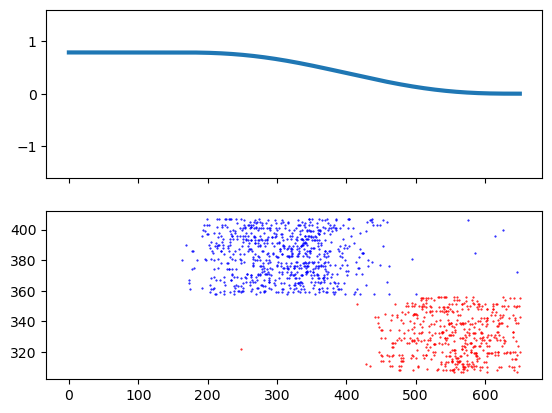

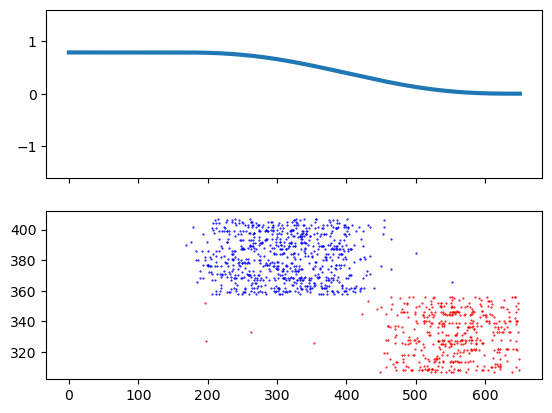

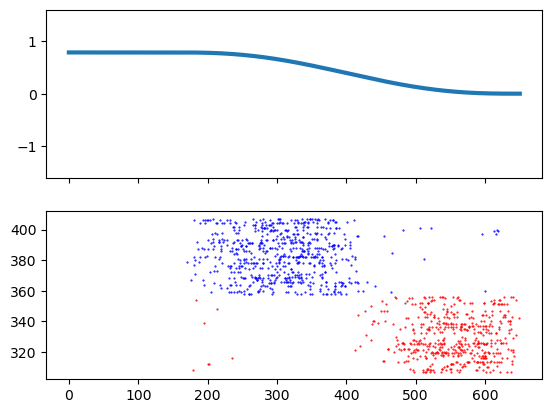

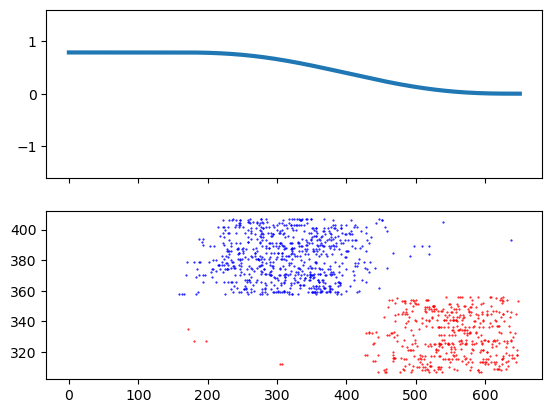

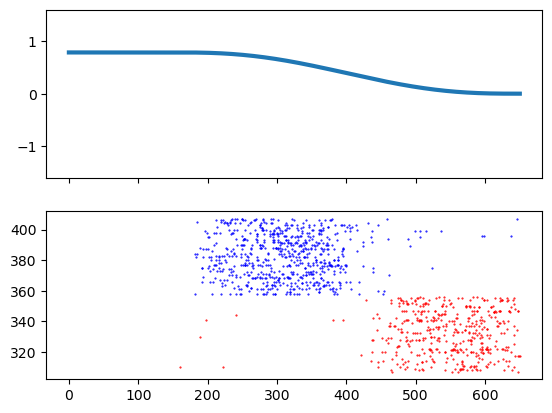

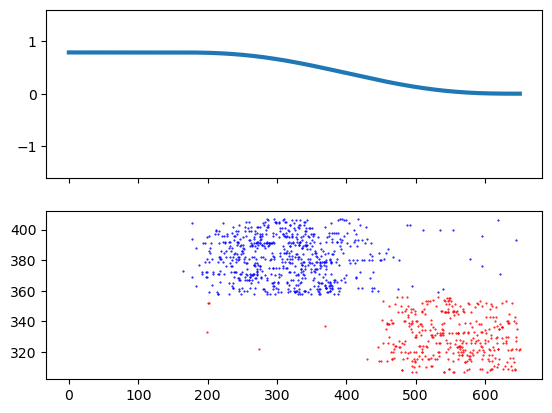

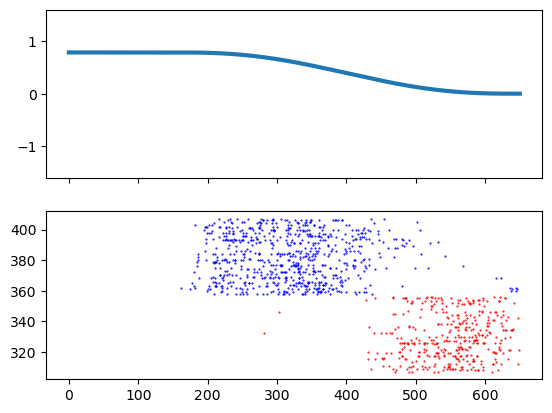

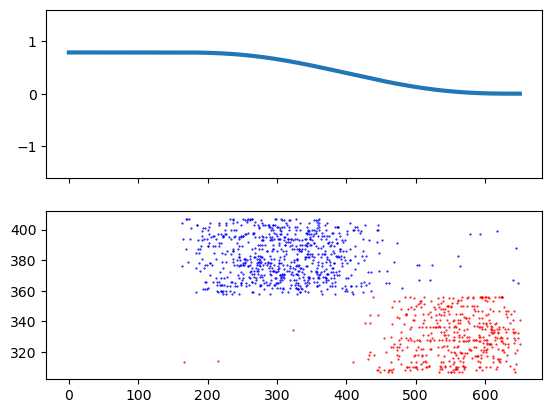

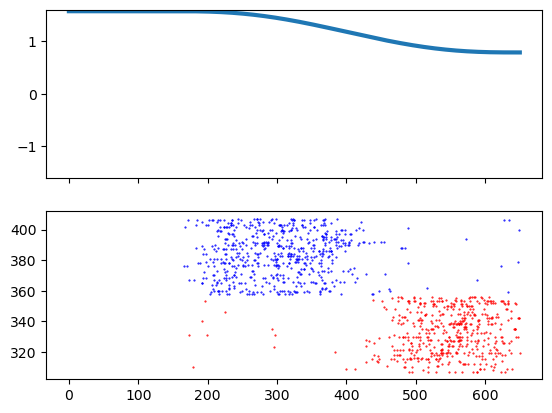

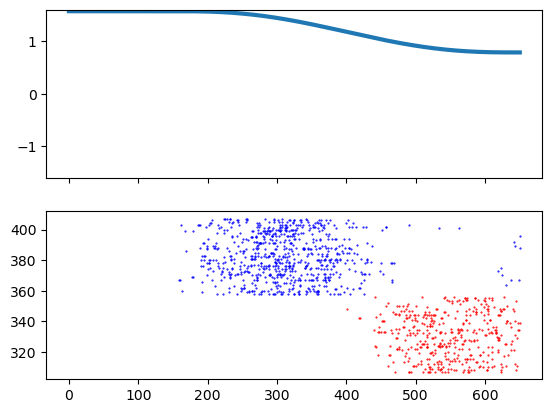

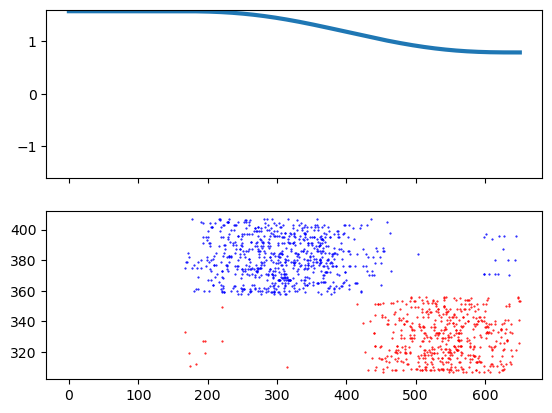

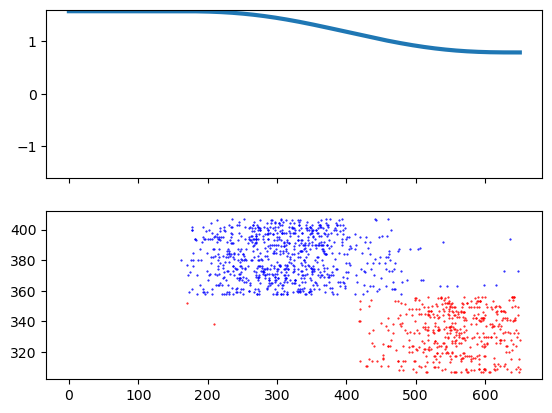

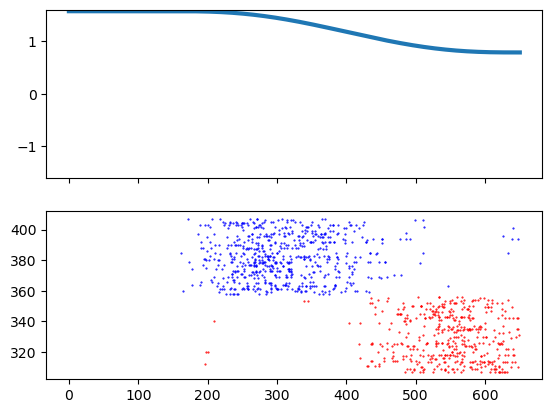

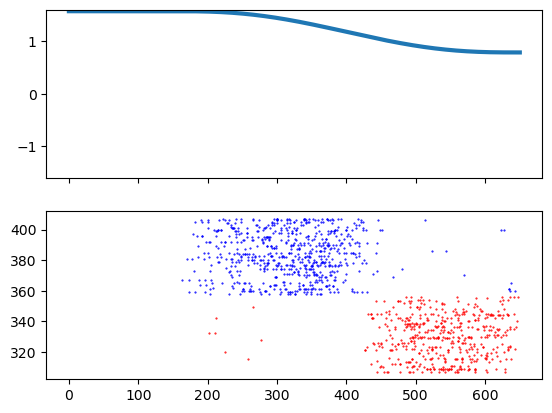

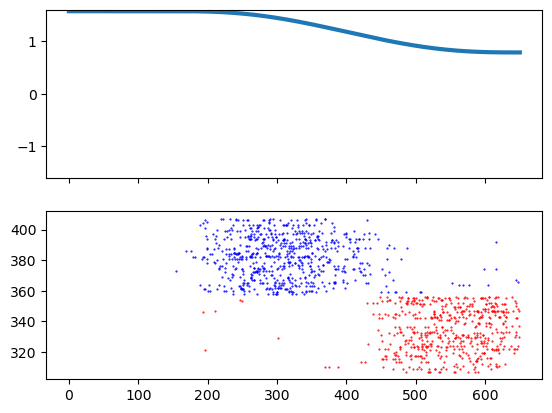

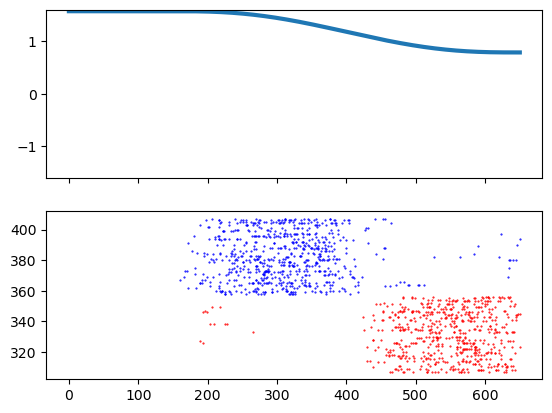

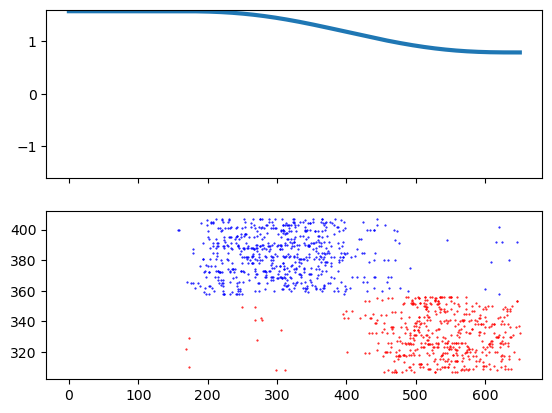

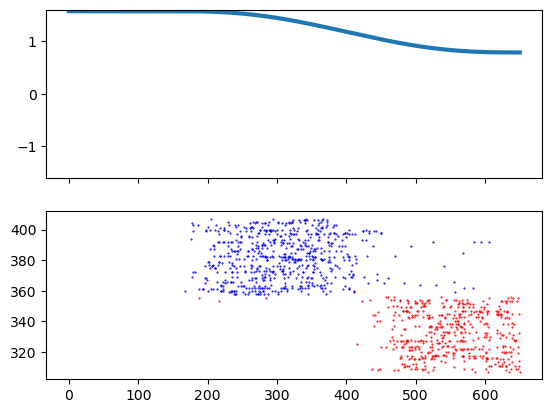

In [3]:
dataset = load_data_file('dataset_spikes.gdf')
time_span = 650.0  # [ms]
res = 0.1  # [ms]
time = time_vect  = np.linspace(0, time_span, num=int(np.round(time_span/res)), endpoint=True)
# Plot
for exp, experiment in enumerate(dataset):
    trj_num = int(experiment[0][0])
    id_pos = experiment[1]
    time_pos = experiment[2]
    id_neg = experiment[3]
    time_neg = experiment[4]

    fig, ax = plt.subplots(2, 1, sharex=True)
    trj = np.loadtxt(f"trajectory{trj_num}.txt")
    ax[0].plot(time_vect, trj, lw=3)
    ax[0].set_ylim(-1.6, 1.6)
    ax[1].plot(time_pos, id_pos,'r.', markersize=1)
    ax[1].plot(time_neg, id_neg,'b.', markersize=1)
    # plt.savefig(f'experiment{exp}.png')